In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
model = pybamm.lithium_ion.DFN()
for event in model.events: 
    if event.name == "Zero electrolyte concentration cut-off":
        model.events.remove(event)
chem = pybamm.parameter_sets.Chen2020 #Cell Chemistry
#chem 
Parameter_values = pybamm.ParameterValues(chemistry=chem)
C_rates = np.arange(0.2,10.2,0.2).tolist()

In [ ]:
from Auxillary_functions import dt_max
sim = dt_max(model=model, Parameter_values=Parameter_values, C_rates=C_rates)
sims = sim


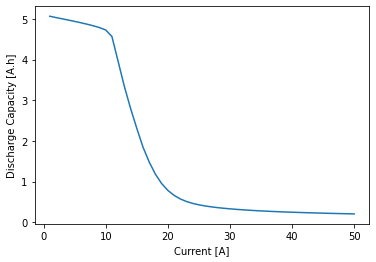

In [3]:
#fig, ax = plt.subplots()
plt.xlabel("Current [A]")
plt.ylabel("Discharge Capacity [A.h]")
capacity = [sol.solution["Discharge capacity [A.h]"].data[-1] for sol in sims ]
current = [sol.solution["Current [A]"].data[-1] for sol in sims]

#plt.scatter(current, capacity)
plt.plot(current,capacity)
plt.show()